<a href="https://colab.research.google.com/github/kristoowae/Portofolio-Google_Notebook/blob/main/UTDI-BIGDATAANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BIG DATA ANALYTICS

NIM   : 225410078 |
Nama  : Kristoforus Nanda Mahardhian |
Kelas : Informatika

In [ ]:
# Import tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Import the dataset
dataset = pd.read_csv('gaji.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# split menjadi data dan target
X = dataset.iloc[:, :-1].values # data
y = dataset.iloc[:, 1].values # target

In [ ]:
# Split dataset kea Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3,
random_state = 0)

In [ ]:
# Proses training/fit
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi
pred = regressor.predict(X_test)

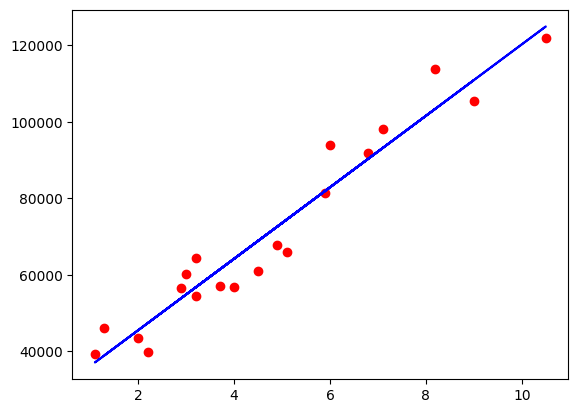

In [ ]:
# Visualisasi hasil training
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

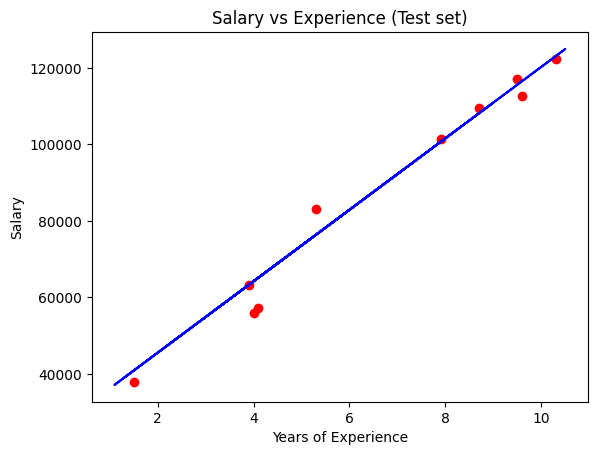

In [ ]:
# Visualising hasil tes prediksi
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# evaluasi
# R-Squared, mendekati 1 lebih baik
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9749154407708353

In [ ]:
# MSE, semakin kecil semakin baik
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

21026037.329511296

In [ ]:
# RMSE, nilai error rata2 asli
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, pred))
rmse

4585.4157204675885

TUGAS 4

In [ ]:
# Import tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# load data, pastikan membaca note
data = pd.read_csv('titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: xlabel='Survived', ylabel='count'>

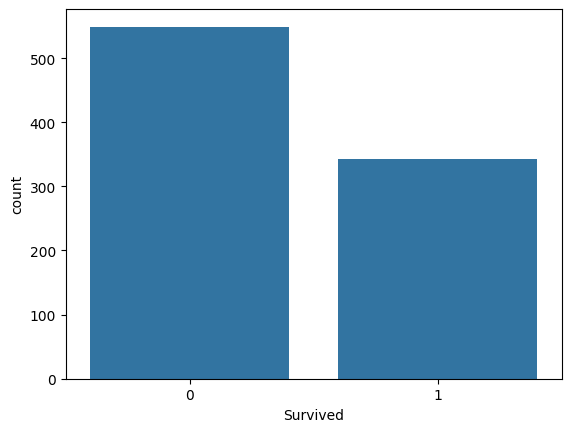

In [ ]:
# Analisa data
# countplot
sns.countplot(x="Survived", data=data)
# 1 = selamat

<Axes: xlabel='Survived', ylabel='count'>

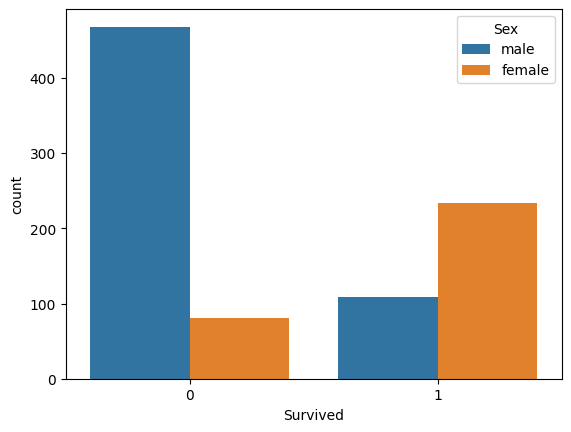

In [ ]:
sns.countplot(x="Survived", hue="Sex", data=data)
# selamat banyak female

<Axes: xlabel='Survived', ylabel='count'>

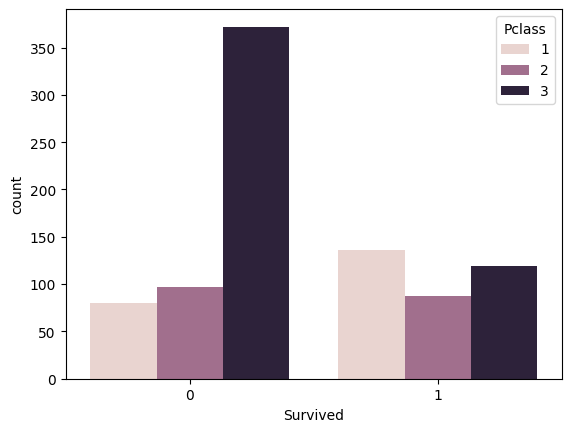

In [ ]:
sns.countplot(x="Survived", hue="Pclass", data=data)
# class 3 banyak tidak selamat

<Axes: ylabel='Frequency'>

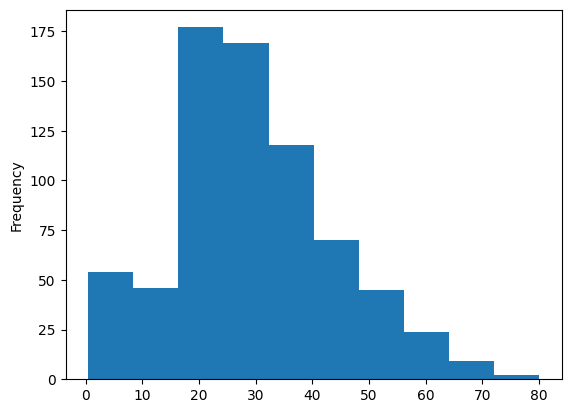

In [ ]:
data['Age'].plot.hist()
# banyak yang berumur 20 - 30

<Axes: ylabel='Frequency'>

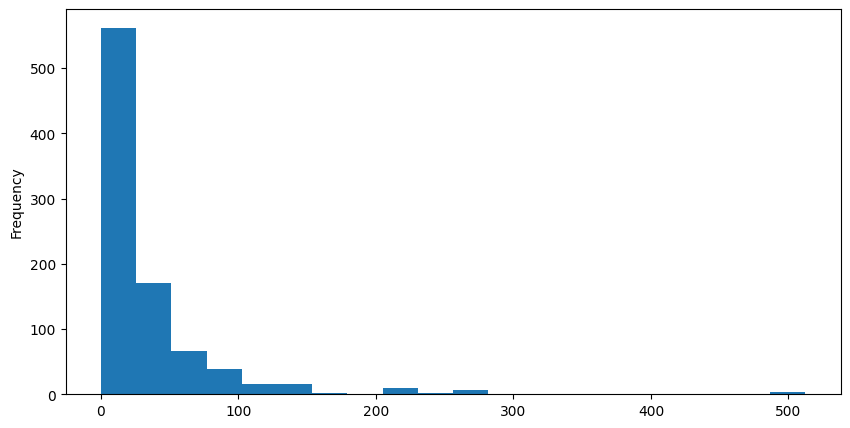

In [ ]:
data['Fare'].plot.hist(bins=20, figsize=(10,5))
# tarif (dolar)

<Axes: xlabel='SibSp', ylabel='count'>

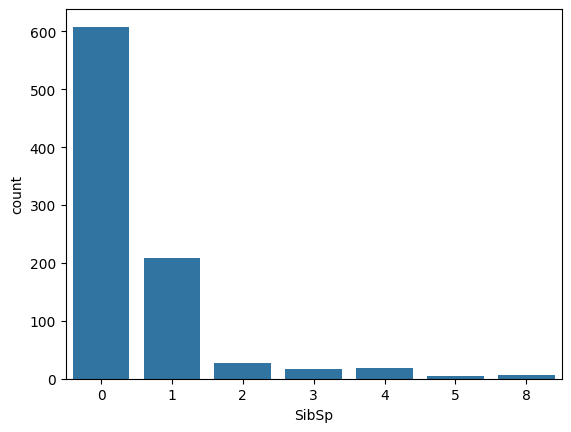

In [ ]:
# sibling/spouse
sns.countplot(x='SibSp', data=data)
# banyak yang tidak

In [ ]:
# Data Wrangling/Cleaning Data
# cek data kosong
data.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

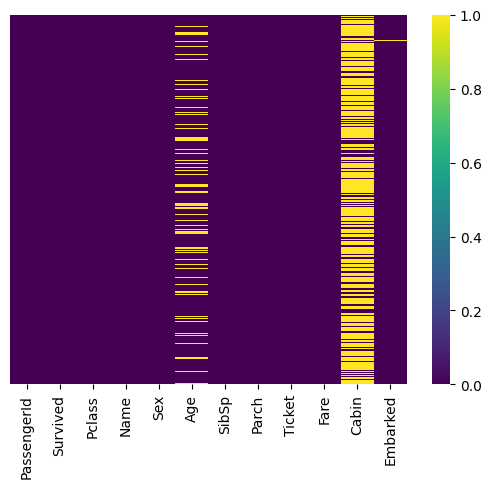

In [ ]:
# plot dengan heatmap
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

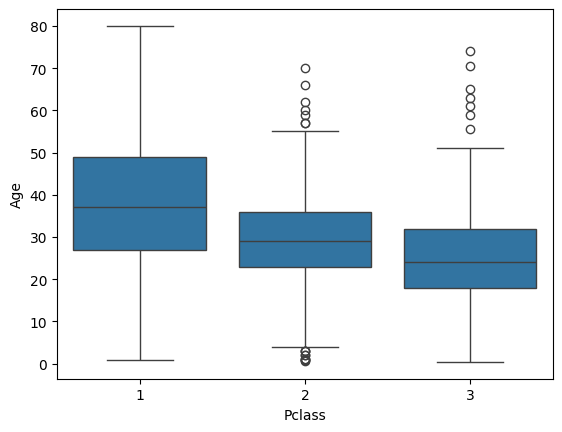

In [ ]:
# box plot
sns.boxplot(x='Pclass',y='Age', data=data)

In [ ]:
#imputation
# cek data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# drop Cabin karena banyak yg kosong
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
# fungsi untuk imputasi fitur Age
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if(pd.isnull(Age)):
    if(Pclass==1):
      return 37
    elif(Pclass==2):
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
# jalankan fungsi
data['Age'] = data[['Age','Pclass']].apply(impute_age, axis=1)

<ipython-input-16-22a25d0c58f3>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
<ipython-input-16-22a25d0c58f3>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

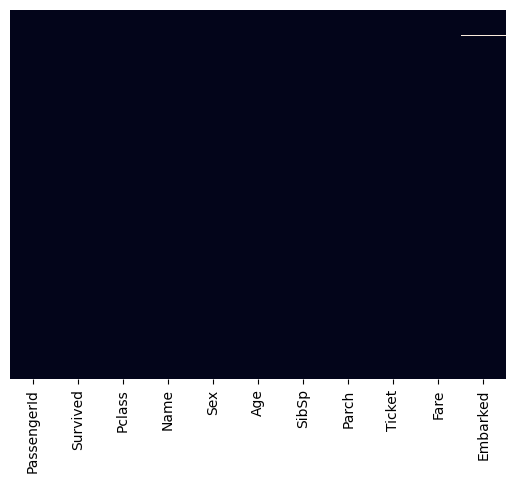

In [ ]:
#cek lagi
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [ ]:
# value masih aneh, dikonversi ke kategorikal supaya bisa diproses
# logistik regression
data.head(2)
# menggunakan strategi one hot encoding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [ ]:
# pemecahan fitur
pd.get_dummies(data['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [ ]:
# pemecahan fitur, ambil male saja
jenkel = pd.get_dummies(data['Sex'], drop_first=True)
jenkel.head()

,male
0,True
1,False
2,False
3,False
4,True


In [ ]:
# pecah embark
emb = pd.get_dummies(data['Embarked'])
emb.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [ ]:
# pecah embark, hilangkan C
emb = pd.get_dummies(data['Embarked'], drop_first=True)
emb.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [ ]:
# Pcl perlu dipisah dan dihilangkan class 1
Pcl = pd.get_dummies(data['Pclass'], drop_first=True)
Pcl.head()

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [ ]:
# gabungkan semuanya
data = pd.concat([data, jenkel, emb, Pcl], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True


In [ ]:
# drop Pclass, sex, dan embarked,, selain hapus PassengerId, Name, ticket
# karena tidak diolah
data.drop(['Sex','Embarked','Pclass', 'PassengerId','Name','Ticket'], axis=1,
 inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


In [ ]:
# Train Data
# tentukan dependen dan independen var
X= data.drop('Survived', axis=1)
y= data['Survived']

In [ ]:
# library untuk split data
from sklearn.model_selection import train_test_split

In [ ]:
# split data ke beberapa bagian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1)

In [ ]:
# buat model
from sklearn.linear_model import LogisticRegression

In [ ]:
# buat model
logModel = LogisticRegression()

In [ ]:
# latih model
logModel.fit(X_train.to_numpy(), y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Convert column names of X_test to strings
X_test.columns = X_test.columns.astype(str)

# Now you can predict using the updated X_test
prediksi = logModel.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# confussion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
# evaluasi model
confusion_matrix(y_test, prediksi)

array([[132,  21],
       [ 37,  78]])

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediksi)

0.7835820895522388

# PRAKTIK KNN

In [ ]:
# Upload Dataset

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# deskripsi data
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# replace zeros dengan nan supaya cleaning lebih mudah
diabetes_data_copy = diabetes_data.copy()
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [ ]:
## tampilkan NaN
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


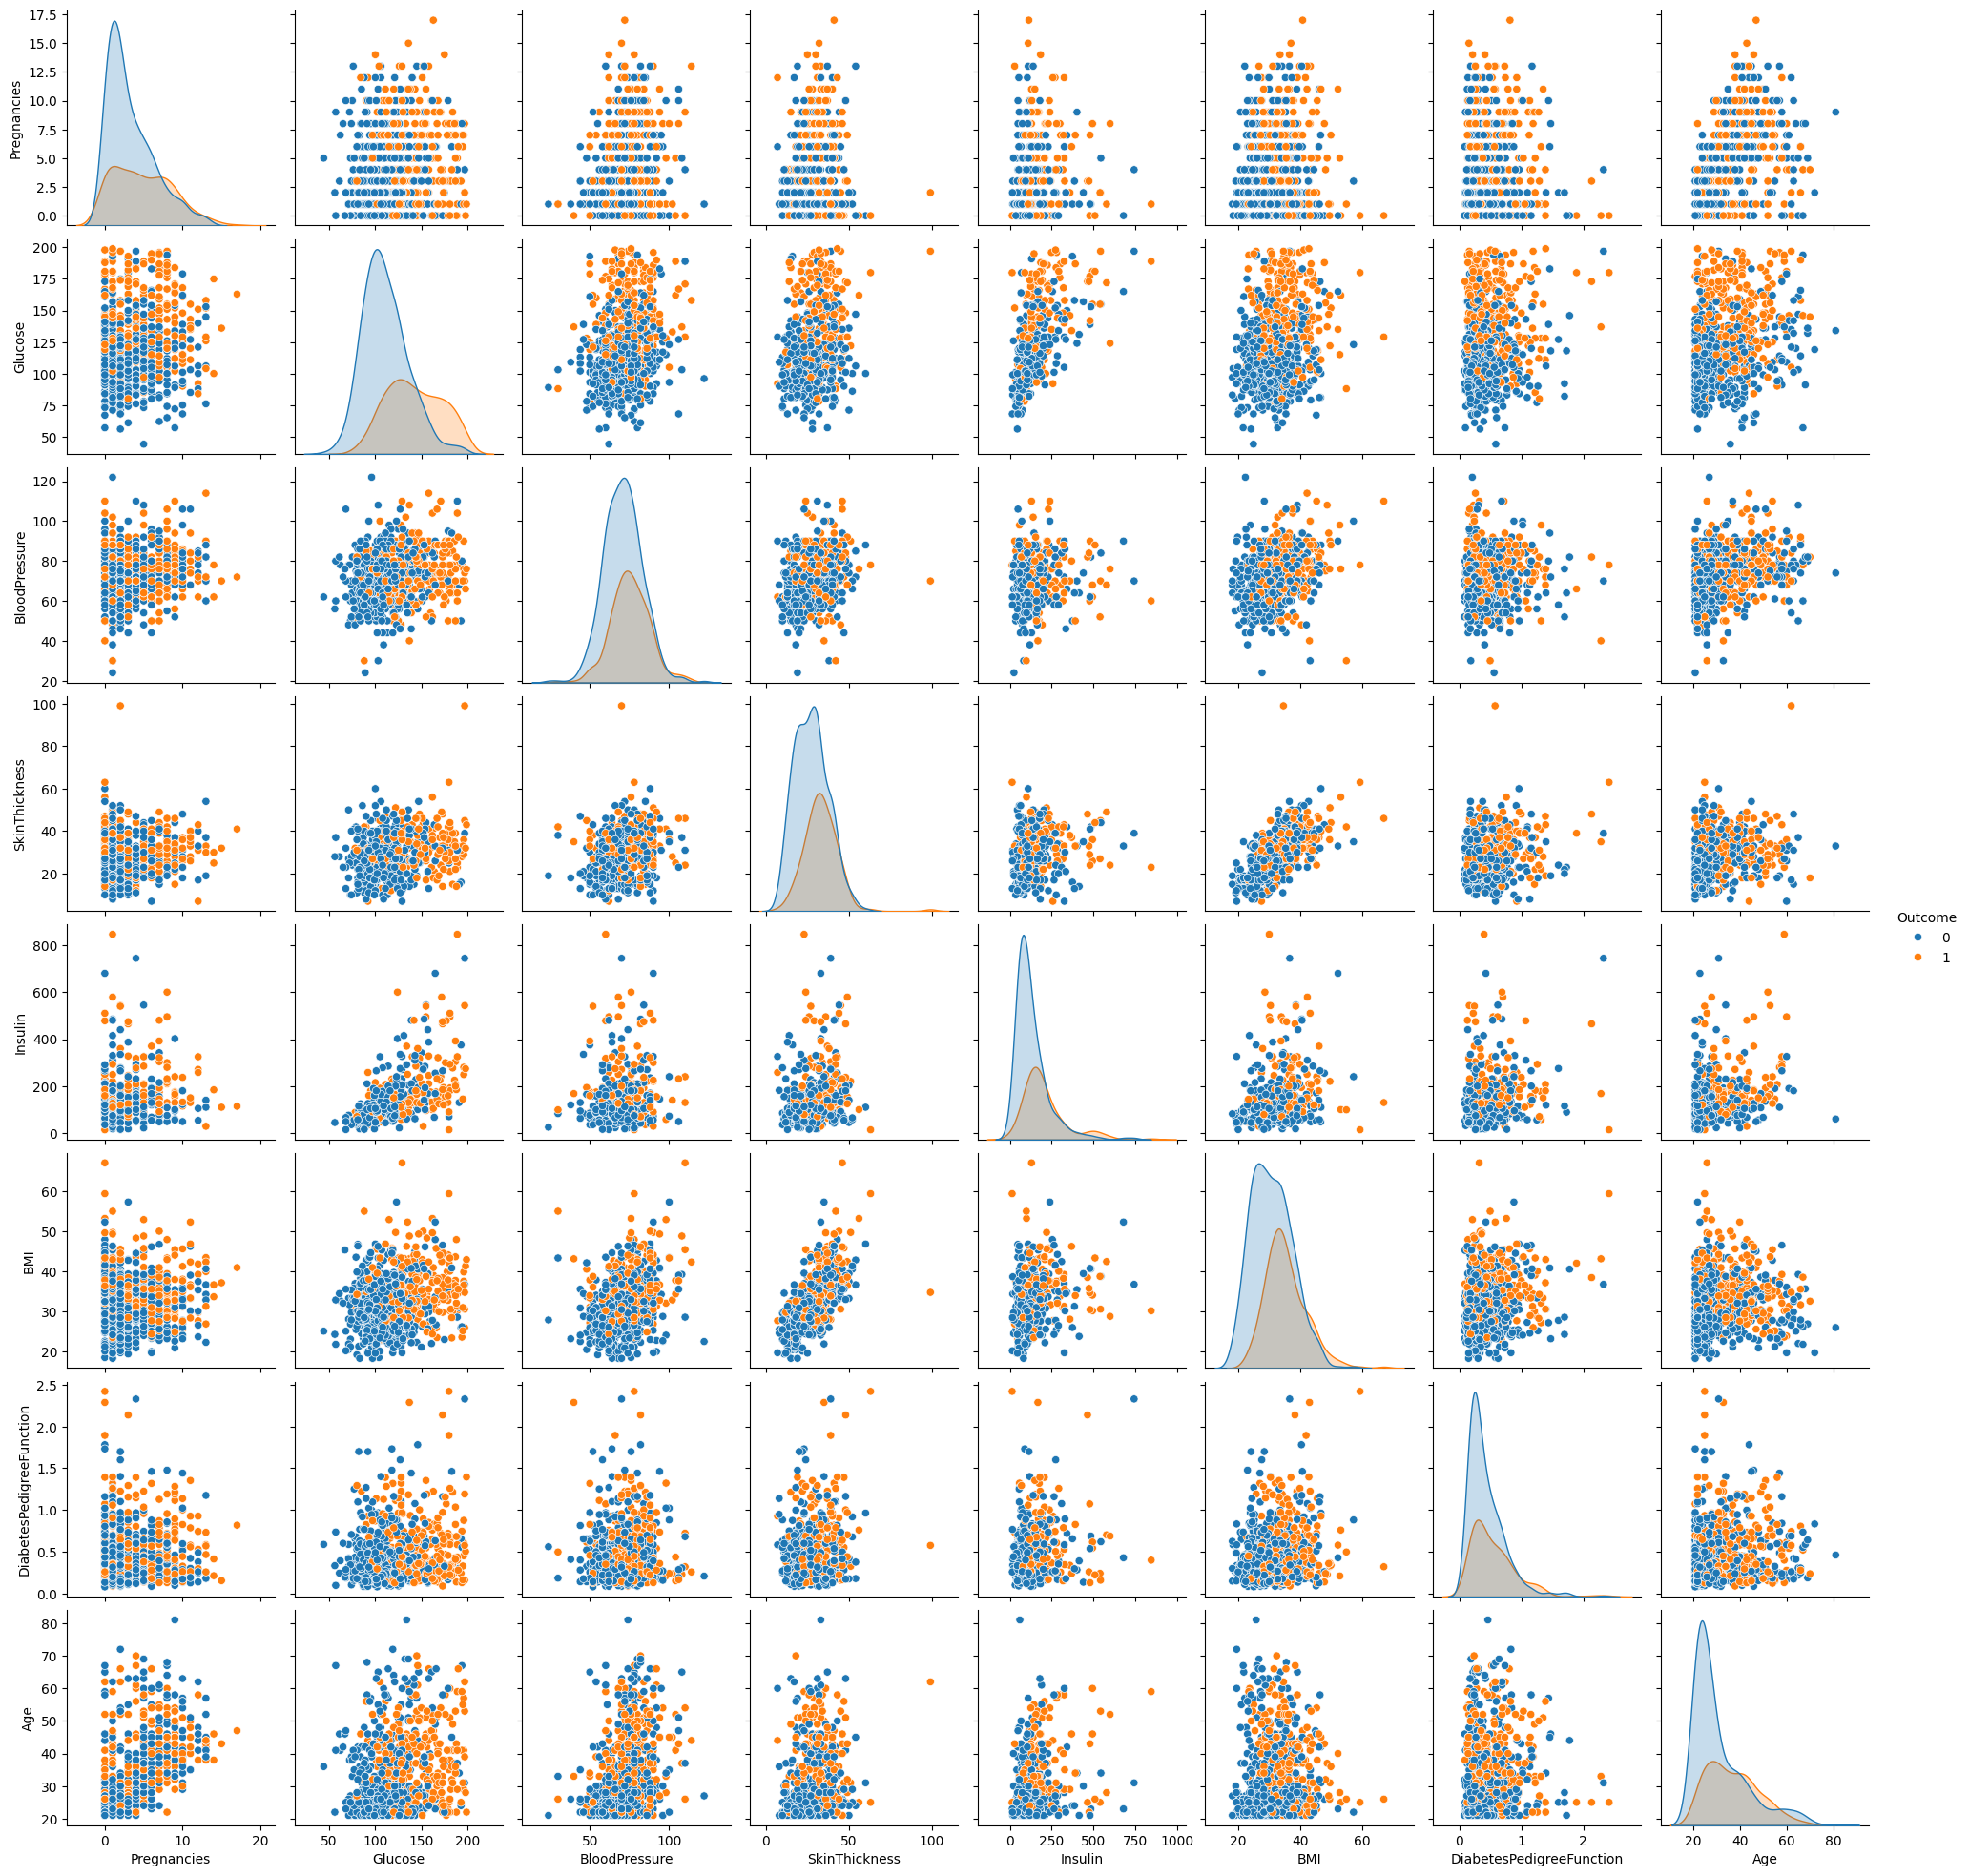

In [ ]:
# cek korelasi
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

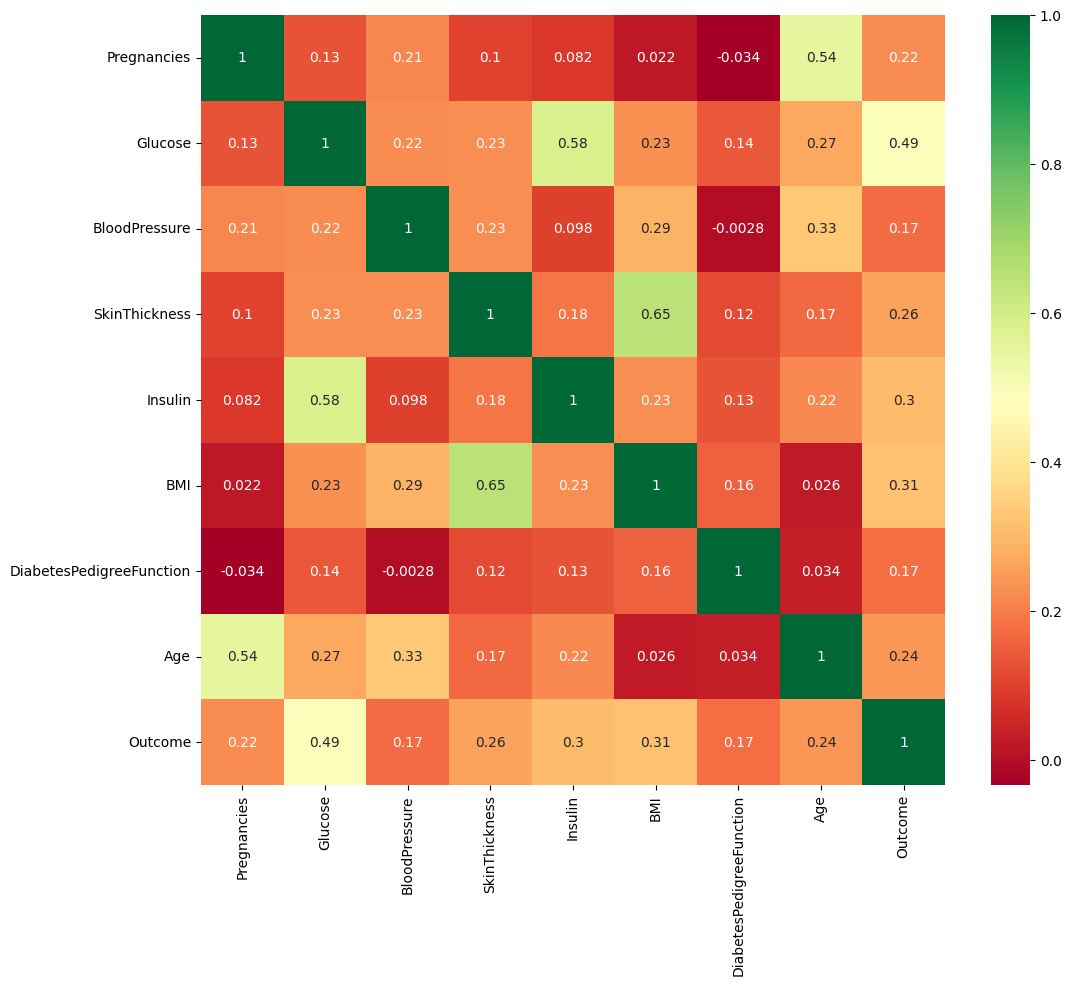

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
#tambahkan kode untuk mengisi nilai nan
diabetes_data_copy.Glucose.fillna(diabetes_data_copy.Glucose.mean(),inplace=True)
diabetes_data_copy.BloodPressure.fillna(diabetes_data_copy.BloodPressure.mean(),inplace=True)
diabetes_data_copy.SkinThickness.fillna(diabetes_data_copy.SkinThickness.mean(),inplace=True)
diabetes_data_copy.Insulin.fillna(diabetes_data_copy.Insulin.mean(),inplace=True)
diabetes_data_copy.BMI.fillna(diabetes_data_copy.BMI.mean(),inplace=True)

<ipython-input-12-8eeacfe0f990>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data_copy.Glucose.fillna(diabetes_data_copy.Glucose.mean(),inplace=True)
<ipython-input-12-8eeacfe0f990>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# optimasi data menggunakan scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
# cek data
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [ ]:
# buat variabel target(y)
y = diabetes_data_copy.Outcome

In [ ]:
#import train_test_split dan split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [ ]:
# membuat model untuk mencari jumlah K
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
#skor yang diperoleh dari data yang sama untuk training dan testing
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
#skor yang diperoleh dari pengetesan menggunakan data testing
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.171875 % and k = [11]


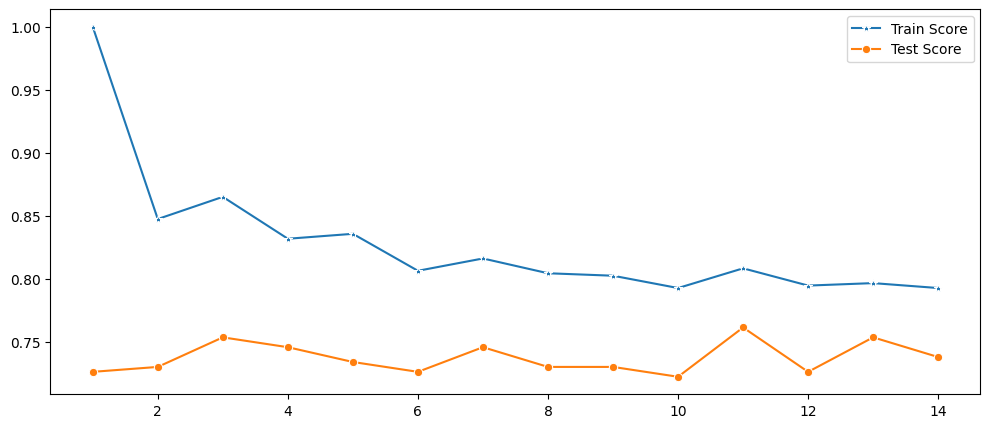

In [ ]:
# visualisasi
plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')

In [ ]:
#membuat model KNN dengan K yang sudah diperoleh
knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.74609375

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[141,  26],
       [ 39,  50]])

# **DECISION TREE**

In [ ]:
# Upload Dataset

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
files

<module 'google.colab.files' from '/usr/local/lib/python3.11/dist-packages/google/colab/files.py'>

In [ ]:
uploaded

{'heart.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,2,1\

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
X = df.drop(columns=['target'])
Y = df['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inisialisasi Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
# Menggunakan metode fit untuk melatih model pada data training
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [ ]:
# Melakukan prediksi pada data testing
dt_predicted = dt.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi kinerja model
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
# Menghitung akurasi model
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(dt_conf_matrix)
print("\n")
# Menampilkan akurasi model
print("Nilai Akurasi untuk model DecisionTreeClassifier:", dt_acc_score * 100, '%\n')
# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support
print("Classification Report:")
print(classification_report(y_test, dt_predicted))

Confusion Matrix:
[[95  3]
 [ 8 99]]


Nilai Akurasi untuk model DecisionTreeClassifier: 94.6341463414634 %

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



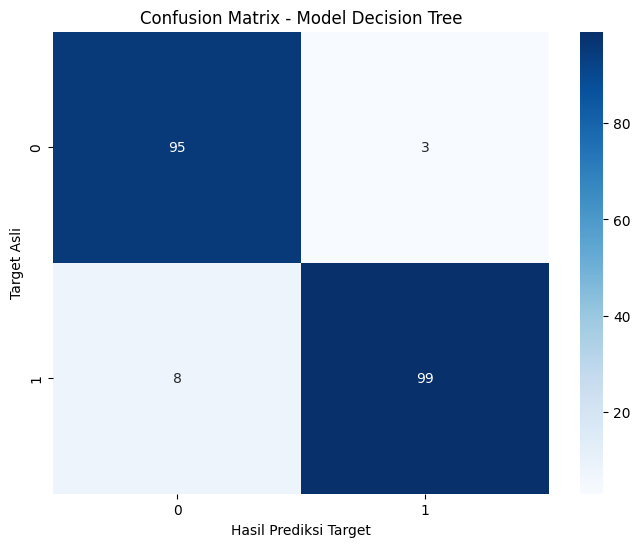

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Heatmap dengan persentase
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, )
plt.title("Confusion Matrix - Model Decision Tree")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()

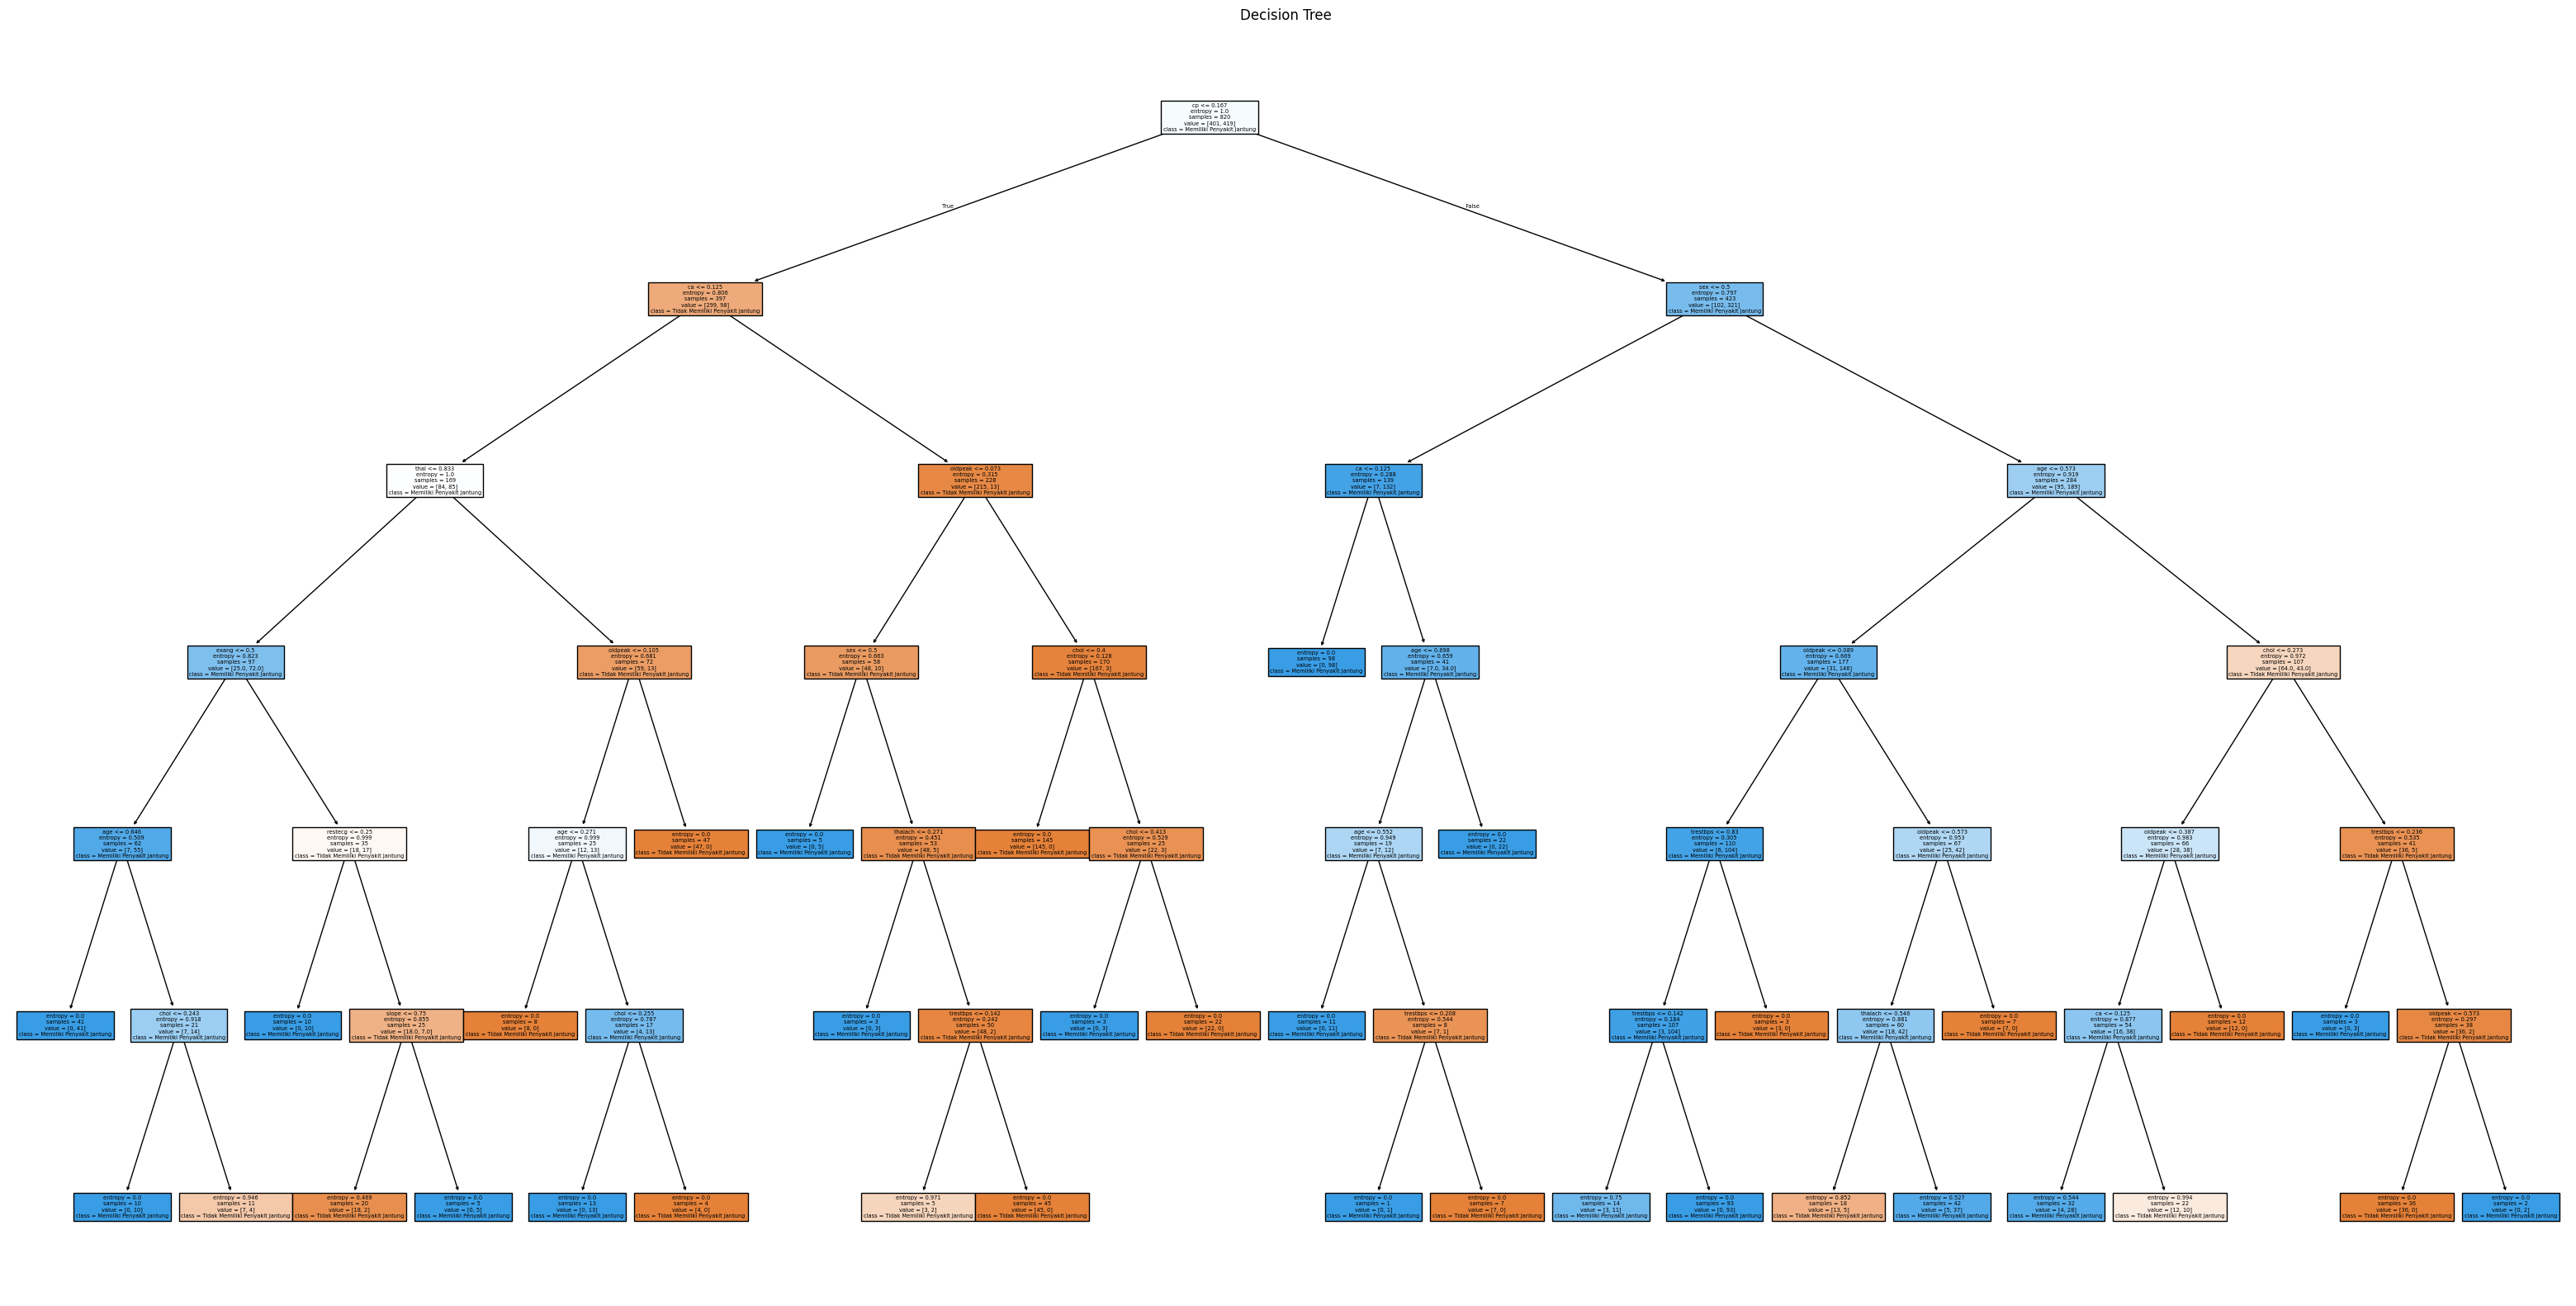

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Tidak Memiliki Penyakit Jantung', 'Memiliki Penyakit Jantung'])
plt.title('Decision Tree ')
plt.show()

## Uji coba menggunakan data baru

Seorang pasien berusia 48 tahun, Laki-Laki, datang ke dokter dengan keluhan nyeri dada tipe 1 (nyeri seperti ditusuk-tusuk) selama 15 menit terakhir. Nyeri dada ini tidak menjalar ke bagian tubuh lain. Pasien memiliki riwayat hipertensi. Hasil pemeriksaan menunjukkan:

- Tekanan darah saat istirahat: 130/80 mmHg
- Kadar kolesterol serum: 245 mg/dL
- Gula darah puasa <=120 mg/dl : Tidak
- Hasil EKG setelah istirahat: Abnormal
- Detak jantung maksimum: 180 bpm
- Mengalami angin setelah berolahraga: Tidak
- Depresi Segmen ST: 0.2 mm
- Kemiringan Segmen ST: Mendatar
- Jumlah pembuluh darah utama yang diwarnai: 0
- Penyakit Menurun/Genetik Thalasemia: Cacat (2)

Berdasarkan data di atas, apakah pasien ini memiliki penyakit jantung?

In [ ]:
# Prediksi data baru
data_baru = [[48, 1, 1, 130, 245, 0, 0, 180, 0, 0.2, 1, 0, 2]] #13 atribut databaru/tanpa label
data_baru_scaled = scaler.transform(data_baru)  # Melakukan scaling pada data baru

prediksi_data_baru_dt = dt.predict(data_baru_scaled)  # Melakukan prediksi

if prediksi_data_baru_dt[0] == 1 :
    keterangan = 'Pasien Memiliki Penyakit Jantung'
elif prediksi_data_baru_dt[0] == 0 :
    keterangan = 'Pasien Tidak Memiliki Penyakit Jantung'

print("\n * Prediksi label untuk data baru Menggunakan Model Decision Tree:", prediksi_data_baru_dt[0],' -> ',keterangan)


 * Prediksi label untuk data baru Menggunakan Model Decision Tree: 1  ->  Pasien Memiliki Penyakit Jantung


# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
X= pd.DataFrame(iris.data, columns=iris.feature_names)
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
Y= iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X, Y)
print(clf.feature_importances_)
print(clf.predict([[6.7, 3.0, 5.2, 2.3]]))

[0.10144835 0.00635724 0.46628917 0.42590525]
[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
# Import the California housing dataset instead of load_boston
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
# Setting as_frame=True loads the data into a pandas DataFrame
housing = fetch_california_housing(as_frame=True)

# The data is in the 'data' attribute and the target is in the 'target' attribute
X = housing.data
Y = housing.target

# You can display the tail of the features DataFrame to verify
X.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
Y=housing.target
Y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np # Import numpy

# Load the California housing dataset
# Setting as_frame=True loads the data into a pandas DataFrame
housing = fetch_california_housing(as_frame=True)

# The data is in the 'data' attribute and the target is in the 'target' attribute
X = housing.data
Y = housing.target

# You can display the tail of the features DataFrame to verify
X.tail()
# %%
Y=housing.target
Y
# %%
clf = RandomForestRegressor (n_estimators=100, max_depth=2, random_state=0)
# Membuat model Random Forest untuk regresi dengan 100 pohon, kedalaman maksimum 2, dan seed acak 0
clf.fit(X, Y)
# Melatih model dengan data fitur X dan target Y (harga rumah)
print(clf.feature_importances_)
# Menampilkan pentingnya setiap fitur dalam menentukan prediksi harga rumah

# Replace the 13-feature input with an 8-feature input corresponding to the California Housing dataset
# You need to provide actual values for these 8 features for the new data point
# Create a NumPy array with the 8 feature values for the new data point
# Replace the values below with the actual 8 feature values for your new data point
# Example values, you should replace these with your specific data
sample_new_data_values = [8.3252, 41.0, 6.98412, 1.02381, 0.573, 6.593, 69.1, 2.4786]

# Convert the list to a NumPy array and reshape it to be a 2D array (1 sample, 8 features)
sample_new_data = np.array(sample_new_data_values).reshape(1, -1)


print(clf.predict(sample_new_data))
# Memprediksi harga rumah berdasarkan data input baru

[1. 0. 0. 0. 0. 0. 0. 0.]
[4.27572922]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **K-MEANS**

## **1.IMPOR LIBRARY YANG DIBUTUHKAN**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Live.csv to Live.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

##**2.MUAT DAN BERSIHKAN DATA**

In [ ]:
# Memuat dataset dari file CSV
try:
    df = pd.read_csv('Live.csv')
    print("Dataset 'Live.csv' berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'Live.csv' berada di direktori yang sama.")
    exit()

# Menghapus kolom yang tidak diperlukan atau yang sepenuhnya kosong
# Kolom 'status_id' dan 'status_published' tidak relevan untuk analisis numerik
# Kolom 'Column1' hingga 'Column4' kosong dan tidak berisi informasi
columns_to_drop = ['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4']
df.drop(columns_to_drop, axis=1, inplace=True)

# Menghapus baris yang mungkin masih memiliki nilai kosong (jika ada)
df.dropna(inplace=True)
print("Pembersihan data selesai.")

Dataset 'Live.csv' berhasil dimuat.
Pembersihan data selesai.


## **3.PRA-PEMROSESAN DAN PENSKALAAN FITUR**

In [ ]:
# K-Means hanya bekerja dengan data numerik.
# Kita ubah kolom 'status_type' menjadi beberapa kolom numerik (0 atau 1)
df_preprocessed = pd.get_dummies(df, columns=['status_type'], drop_first=True)

# Memilih semua fitur numerik untuk clustering
features = df_preprocessed.copy()

# PENTING: Lakukan penskalaan (standardization) pada fitur.
# Ini agar fitur dengan nilai besar (misal: num_reactions) tidak mendominasi
# fitur dengan nilai kecil (misal: num_angrys).
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print("Pra-pemrosesan dan penskalaan fitur selesai.")

Pra-pemrosesan dan penskalaan fitur selesai.


## **4.MENENTUKAN JUMLAH CLUSTER OPTIMAL (METODE SIKU)**

Plot Metode Siku telah dibuat dan disimpan sebagai 'elbow_plot.png'.


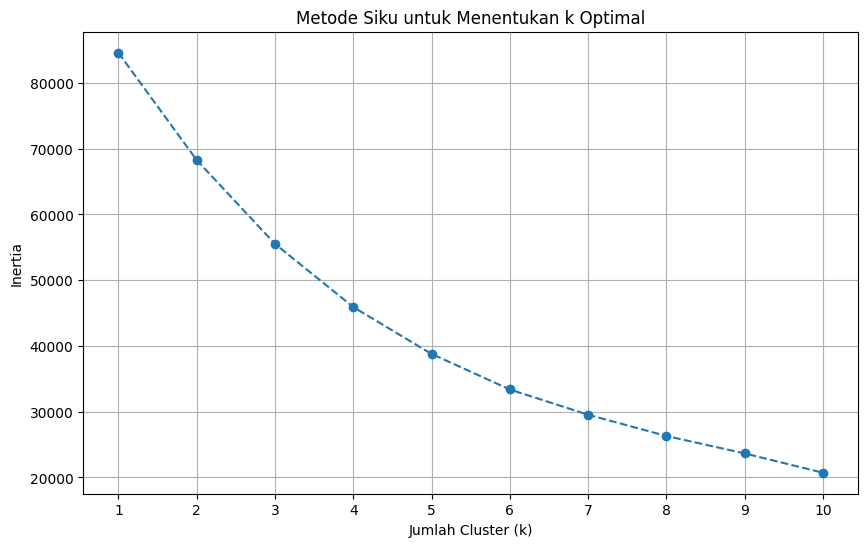

In [ ]:
# Kita akan mencoba K-Means dengan k dari 1 sampai 10 dan melihat 'inertia'-nya
# Inertia adalah jumlah kuadrat jarak sampel ke pusat cluster terdekatnya.
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_elbow.fit(features_scaled)
    inertia.append(kmeans_elbow.inertia_)

# Membuat plot Metode Siku (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Siku untuk Menentukan k Optimal')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow_plot.png') # Menyimpan plot sebagai file gambar
print("Plot Metode Siku telah dibuat dan disimpan sebagai 'elbow_plot.png'.")

## **5.MENJALANKAN K-MEANS DENGAN K OPTIMAL**

In [ ]:
# Berdasarkan plot siku, kita memilih k=3 sebagai jumlah cluster optimal.
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Melatih model K-Means pada data yang sudah diskalakan
kmeans.fit(features_scaled)
print(f"Model K-Means dengan k={optimal_k} telah dilatih.")

# Menambahkan hasil label cluster ke dataframe asli
df['cluster'] = kmeans.labels_

# Menyimpan dataframe yang sudah berisi label cluster ke file CSV baru
output_filename = 'Live_clustered.csv'
df.to_csv(output_filename, index=False)
print(f"Hasil clustering telah disimpan ke file '{output_filename}'.")

Model K-Means dengan k=3 telah dilatih.
Hasil clustering telah disimpan ke file 'Live_clustered.csv'.


## **6.VISUALISASI HASIL CLUSTER DENGAN PCA**

Visualisasi cluster dengan PCA telah dibuat dan disimpan sebagai 'kmeans_clusters_pca.png'.

Proses selesai.


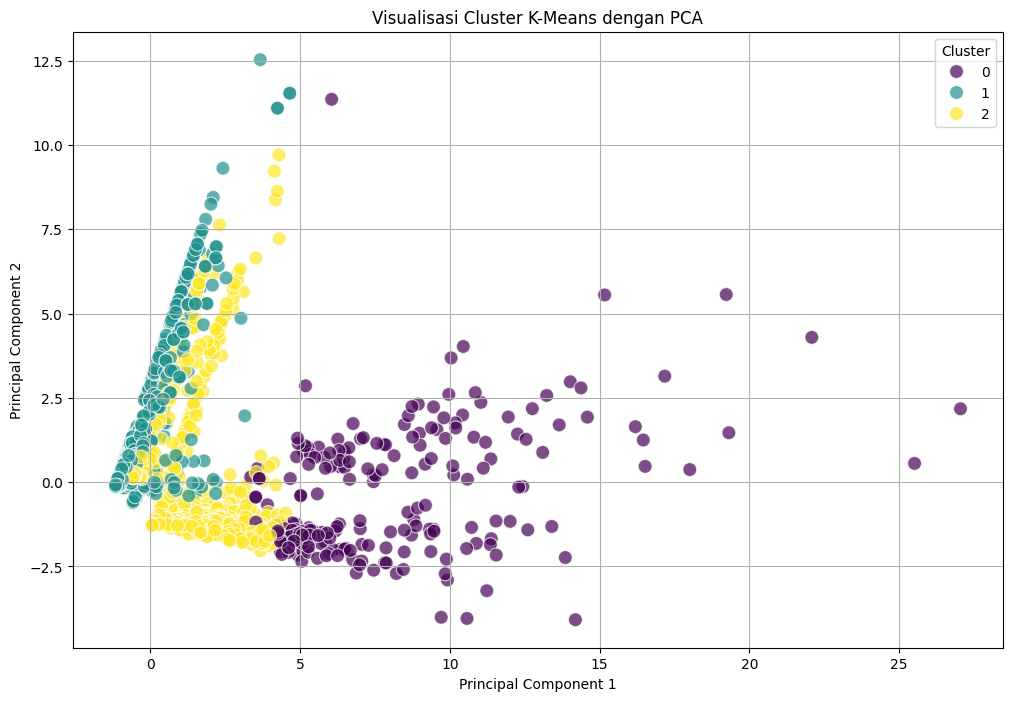

In [ ]:
# Karena data kita memiliki banyak dimensi, kita gunakan PCA untuk mereduksinya
# menjadi 2 dimensi agar bisa digambarkan dalam scatter plot.
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Membuat dataframe baru untuk hasil PCA
df_pca = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = kmeans.labels_

# Membuat scatter plot dari hasil PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Cluster K-Means dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('kmeans_clusters_pca.png') # Menyimpan visualisasi sebagai file gambar
print("Visualisasi cluster dengan PCA telah dibuat dan disimpan sebagai 'kmeans_clusters_pca.png'.")

print("\nProses selesai.")

## **7.HASIL YANG TELAH DI CLUSTERING**

In [ ]:
df = pd.read_csv('Live_clustered.csv')
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,video,529,512,262,432,92,3,1,1,0,2
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,2
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1


**Laporan Analisis Segmentasi Postingan Facebook Menggunakan K-Means Clustering**

Dokumen ini menyajikan analisis dan interpretasi hasil dari pengelompokan (clustering) data interaksi postingan Facebook dari file Live.csv menggunakan algoritma K-Means. Tujuannya adalah untuk mengidentifikasi pola-pola atau segmen-segmen yang berbeda dalam data tersebut.

1. **Pra-pemrosesan dan Persiapan Data**

  Langkah pertama adalah memastikan data siap untuk dianalisis. Proses yang dilakukan meliputi:


  *   Pembersihan Data: Empat kolom (Column1, Column2, Column3, Column4) yang tidak berisi data sama sekali telah dihapus. Selain itu, kolom status_id yang unik untuk setiap baris juga dihapus karena tidak memberikan informasi pola untuk clustering.
  *   Transformasi Data Kategorikal: Kolom status_type yang berisi teks (seperti 'photo', 'video', 'link') diubah menjadi format numerik menggunakan teknik One-Hot Encoding. Ini adalah syarat mutlak agar algoritma K-Means dapat memprosesnya.
  *   Penskalaan Fitur (Standardization): Fitur-fitur numerik seperti num_reactions dan num_comments memiliki rentang nilai yang sangat berbeda. Untuk mencegah fitur dengan nilai besar mendominasi proses clustering, semua fitur disamakan skalanya menggunakan StandardScaler. Langkah ini sangat penting untuk mendapatkan hasil yang akurat.

2. **Penentuan Jumlah Cluster Optimal (Metode Siku)**
Untuk menemukan jumlah segmen (cluster) yang paling alami dalam data, digunakanlah Metode Siku (Elbow Method). Metode ini mengevaluasi kualitas pemisahan cluster pada berbagai jumlah k. Berdasarkan grafik elbow_plot.png yang dihasilkan, terlihat bahwa penurunan laju inertia (metrik kepadatan cluster) menjadi lebih landai setelah k=2 dan k=3. Titik "siku" ini menandakan jumlah cluster yang optimal. Berdasarkan grafik tersebut, 3 cluster dipilih sebagai jumlah yang ideal untuk memisahkan data secara bermakna.

3. **Analisis dan Profil Setiap Cluster**
Setelah menjalankan K-Means dengan k=3, kita dapat menganalisis karakteristik rata-rata dari setiap cluster untuk memahami apa yang membedakannya.

**Profil Cluster 0: "Postingan Foto Interaksi Standar"**
  *   Ukuran Cluster: Ini adalah segmen terbesar, berisi 6.383 postingan (sekitar 90% dari total data).
  *   Tipe Konten Dominan: Foto.
  *   Interaksi Rata-rata: Rendah hingga sedang (Reaksi: 163, Komentar: 158, Shares: 25).
  *   Persona: Ini adalah segmen "business as usual". Kontennya adalah pembaruan rutin atau visual standar yang tidak memicu interaksi viral, namun menjadi fondasi utama dari aktivitas halaman Facebook tersebut.


  **Profil Cluster 1: "Postingan Viral Super"**

  *   Ukuran Cluster: Sangat langka, hanya berisi 7 postingan.
  *   Tipe Konten Dominan: Video.
  *   Interaksi Rata-rata: Luar biasa tinggi (Reaksi: 2.633, Komentar: 2.338, Shares: 364).
  *   Persona: Ini adalah konten yang sangat viral. Mungkin acara langsung (live event) besar, pengumuman penting, atau video yang sangat menarik yang berhasil menjangkau audiens terluas.


  **Profil Cluster 2: "Postingan Video Performa Tinggi"**
  *   Ukuran Cluster: Berisi 660 postingan.
  *   Tipe Konten Dominan: Video.
  *   Interaksi Rata-rata: Tinggi (Reaksi: 868, Komentar: 1.297, Shares: 224). Tingkat interaksinya jauh di atas Cluster 0.
  *   Persona: Ini adalah pilar konten video yang sukses. Kontennya sangat menarik dan berhasil memicu diskusi (komentar tinggi) serta penyebaran (shares tinggi), meskipun tidak seviral Cluster 1.

4. **Visualisasi Hasil Clustering**
Untuk memvisualisasikan pemisahan cluster, data yang memiliki banyak dimensi direduksi menjadi dua dimensi menggunakan PCA. Visualisasi (kmeans_clusters_pca.png) yang dihasilkan secara grafis mengonfirmasi hasil analisis:

  *   Cluster 0 membentuk kelompok besar dan padat, sesuai dengan perannya sebagai segmen mayoritas.
  *   Cluster 2 berada di antara dua cluster lainnya, menunjukkan tingkat interaksi yang lebih tinggi dari cluster 0.
  *   Cluster 1, meskipun kecil, terlihat jelas berada di posisi ekstrem, menegaskan statusnya sebagai kelompok postingan dengan performa interaksi tertinggi (outlier positif).

5. **Kesimpulan dan Rekomendasi Bisnis**
Analisis K-Means berhasil mengidentifikasi tiga segmen postingan yang berbeda secara signifikan berdasarkan tipe konten dan tingkat interaksi audiens.

  Rekomendasi:
  *   Strategi Konten Video: Mengingat Cluster 1 dan 2 (konten performa tertinggi) didominasi oleh video, sumber daya harus difokuskan untuk memproduksi lebih banyak konten video berkualitas. Analisis lebih lanjut terhadap 7 postingan di Cluster 1 dapat memberikan wawasan tentang formula konten viral.
  *   Optimalisasi Postingan Foto: Walaupun Cluster 0 memiliki interaksi lebih rendah, sebagai segmen terbesar, ada peluang untuk meningkatkan performanya. Eksperimen dengan jenis visual, waktu posting, atau copywriting pada postingan foto dapat dilakukan.
  *   Segmentasi Audiens: Pola interaksi ini menyiratkan adanya segmen audiens yang berbeda. Strategi pemasaran dapat disesuaikan untuk menargetkan audiens yang lebih suka konten video versus audiens yang lebih pasif.




